# Steps :
* Data analysis
* Data cleaning
* First model
* Optimization
* Best model

# Import librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import ast
from collections import Counter

# Import data

In [2]:
df_train = pd.read_csv("data/train.txt", names=["text", "emotion"], sep=";")
df_train

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [3]:
df_train["emotion"].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emotion, dtype: int64

# Data exploration dev_b

In [41]:
### Word occurrences
## remove common sw (but the no/not sw that can be meaningful in emotion datasets) - see removed_stopwords.txt

sw_file = open('misc/stopwords.txt', "r")
try :
    content = sw_file.read()
    stopwords = ast.literal_eval(content)
finally:
    sw_file.close()

df_train['text_without_sw'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df_train.head()

,text,emotion,text_without_sw
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy


Word(s) ignored : stopwords + ['feel', 'feeling', 'like', 'im', 'but', 'not']


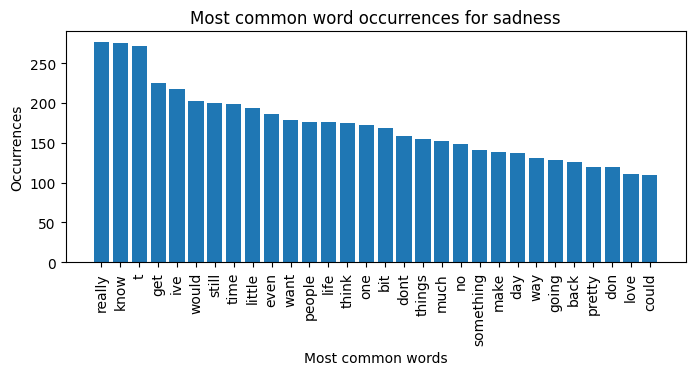

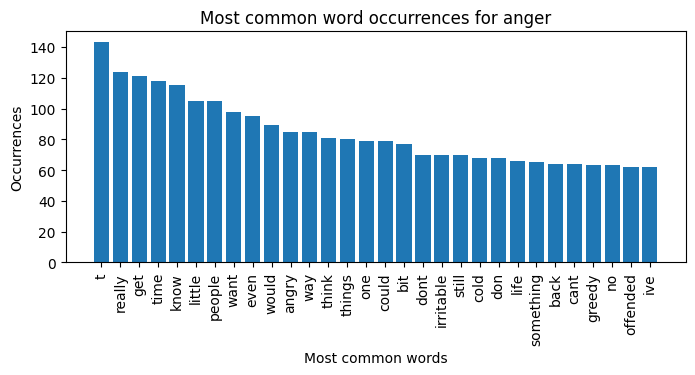

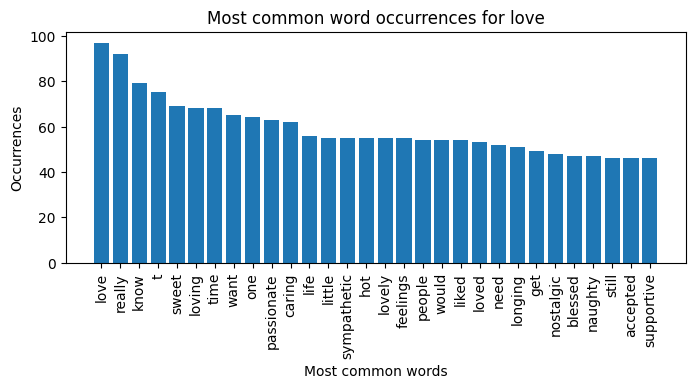

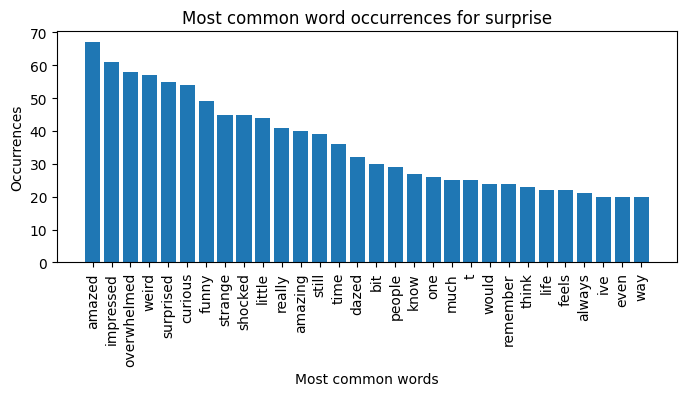

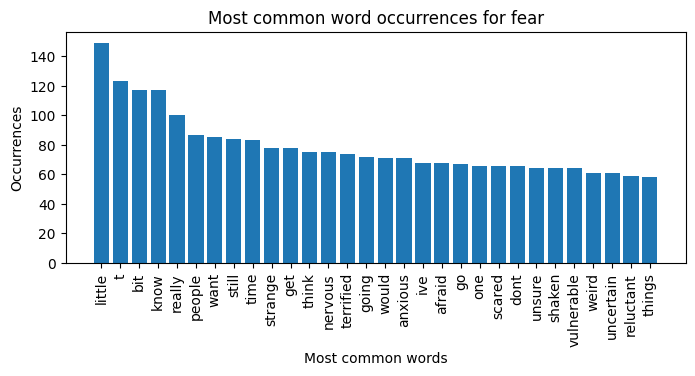

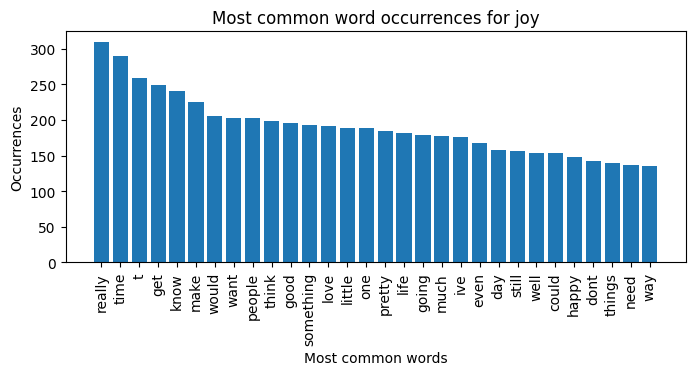

In [44]:

def show_word_occurrences(emotion, nb_word = 30, ignoring_list = [], plot=True):
    """
    Func visualize word occurrences by emotion
    return :
        - most_common_words : list of most common words
    params :
        - emotion : str | 'all' for every emotion
        - nb_word : int | nb of most commn words considered
        - ignoring_list : [str] | list of words to be ignored in plot
        - plot : bool | plot graph or not
    """
    all_words = []
    if not emotion == 'all' :
        tmp_df = df_train[df_train['emotion'] == emotion]
    else :
        tmp_df = df_train
        
    for _, val in tmp_df.iterrows():
        all_words.extend(val['text_without_sw'].split(' '))

    word_count = Counter(all_words)    
    most_common = word_count.most_common(nb_word + len(ignoring_list))
    most_common_ignored = []

    for w, _ in most_common :
        if w in ignoring_list : 
            continue
        most_common_ignored.append((w, _))
        
    most_common_words = [_[0] for _ in most_common_ignored]
    
    if plot :
        plt.figure(figsize=(8, 3))
        plt.xlabel('Most common words')
        plt.ylabel('Occurrences')
        plt.title(f'Most common word occurrences for {emotion}')
        plt.bar([_[0] for _ in most_common_ignored], [_[1] for _ in most_common_ignored])
        plt.xticks(rotation=90)
    
    return most_common_words


# update ignoring list below
ignoring_list = ['feel', 'feeling', 'like', 'im', 'but', 'not'] 
print(f'Word(s) ignored : stopwords + {ignoring_list}')
for em in df_train['emotion'].unique():
    show_word_occurrences(em, ignoring_list=ignoring_list)


At first glance : 
- tf/idf encoding might give a low accuracy
- co-occurrences can be relevant
- semantic encoding may be the best option

- Class balancing needed + update personalized stopwords list